In [9]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

#a Card Object is identified by its (unique) numerical value and its (unique) suit 
class Card():
    def __init__(self,value,suit): #name = 1,2,...,10 ; suit = 'Spade',...,'Bastoni'
        self.value = value
        self.suit = suit
    def __str__(self):
        return str(self.value) + ' ' + str(self.suit)
    
def solitaire(n,trials, lendeck = 40):
    win = 0
    cards_draw = n
    
    for i in range(trials):        
        #Deck creation
        num = [j for j in range(1, lendeck//4 +1)]
        symbol_list = ['Spade' , 'Coppe', 'Denara' , 'Bastoni']
        deck = []
        for x in num:
            for y in symbol_list:
                deck.append(Card(x,y))
                    
        #Shuffling the Deck
        random.shuffle(deck)
            
        #Creating subdecks for each symbol
        coppe_deck = [0]
        spade_deck = [0]
        denara_deck = [0]
        bastoni_deck = [0]
            
        counter = 0
        pick = cards_draw - 1 #pick is the 'list pointer'
        
        upper_bound = (40//cards_draw + 1)*(cards_draw*(40//cards_draw)/2 + (40 % cards_draw))
        #The following is the actual game
        while counter < upper_bound and len(deck) > 0:
            #counter condition is the treshold that divide a winning and a losing deck
            if len(deck) < cards_draw:
                #limit case when in end game you have a deck of cards smaller than 
                pick = len(deck) - 1
                    
            if pick > len(deck) : #resetting the pointer after you reach the bottom of the deck
                pick = cards_draw - 1
                    
                #Cases in which you pull a useful card            
            if pick < len(deck) and deck[pick].suit == 'Spade' and int(deck[pick].value) == spade_deck[-1] + 1:
                spade_deck.append(spade_deck[-1] + 1 )
                deck.remove(deck[pick])
                pick += cards_draw - 1 #-1 cause you have removed a card from the deck
            elif pick < len(deck) and deck[pick].suit == 'Coppe' and int(deck[pick].value) == coppe_deck[-1] + 1:
                coppe_deck.append(coppe_deck[-1] + 1)
                deck.remove(deck[pick])
                pick += cards_draw - 1 #-1 cause you have removed a card from the deck
            elif pick < len(deck) and  deck[pick].suit == 'Denara' and int(deck[pick].value) == denara_deck[-1] + 1:
                denara_deck.append(denara_deck[-1] + 1)
                deck.remove(deck[pick])
                pick += cards_draw - 1 #-1 cause you have removed a card from the deck
            elif pick < len(deck) and  deck[pick].suit == 'Bastoni' and int(deck[pick].value) == bastoni_deck[-1] + 1:
                bastoni_deck.append(bastoni_deck[-1] + 1)
                deck.remove(deck[pick])
                pick += cards_draw - 1 #-1 cause you have removed a card from the deck
                
            #Case in which you pull a useless card
            else:
                pick += cards_draw #here we do NOT subtract 1 because in case of a useless card we do NOT remove any card from the deck 
                
            counter+=1
            #Winning condition
            if len(deck) == 0:
                win += 1
    return win
    

#USER INTERFACE & CSV Creation
f = open('Solitaire.csv', 'w')
f.write('Game Session,')
f.write('Cards Pick,')
f.write('Trials,')
f.write('Deck Type,')
f.write('Victories,')
f.write('Win Rate,')

gameid = 1
condition = True
while condition:
    print('GAME SESSION '+str(gameid))
    n = int(input('How many cards do you want to discard any time? (max 5 suggested)'))
    print('\n')
    t = int(input('How many trials do you want to get through? (1*000 - 100*000 suggested)'))
    decktype = input('With which deck do you want to play? [p] Poker [i] Italian')
    if decktype == 'p':
        c = 52
    if decktype == 'i':
        c = 40
    print('\n')
    print('simulating the game...')
    print('\n')
    
    wins = solitaire(n,t,c)
    
    f.write('\n')
    f.write(str(gameid)+',')
    f.write(str(n)+',')
    f.write(str(t)+',')
    if decktype == 'p':
        f.write('Poker,')
    if decktype == 'i':
        f.write('Italian,')        
    f.write(str(wins)+',')
    f.write(str(round(wins/t , 4)))
    gameid += 1
    
    print('You have won ' + str(wins) +' times.') 
    print('\n')
    print('Your result has been registered')
    ending = input('Press [y] key to play again, or any other one to exit')
    print('---------------------------------------------------------------------')
    
    condition = (ending=='y')
f.close()
   

GAME SESSION 1
How many cards do you want to discard any time? (max 5 suggested)1


How many trials do you want to get through? (1*000 - 100*000 suggested)100
With which deck do you want to play? [p] Poker [i] Italianp


simulating the game...


You have won 100 times.


Your result has been registered
Press [y] key to play again, or any other one to exitn
---------------------------------------------------------------------


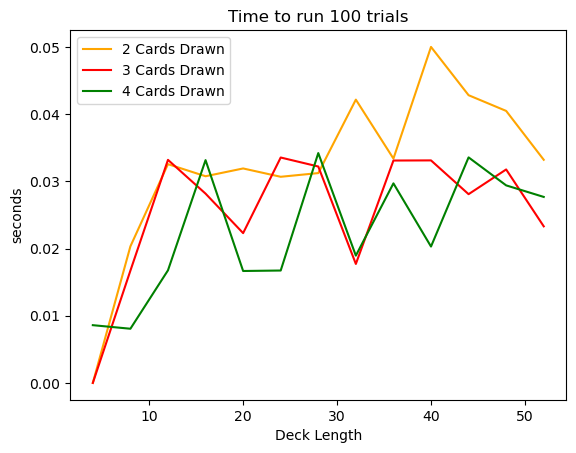

In [18]:
lst_time2 = []
deck_length = [i for i in range(4,53,4)]
for j in deck_length:
    start_time = time.time()
    solitaire(2,100,j)
    lst_time2.append(round(time.time() - start_time,5))

lst_time3 = []
for j in deck_length:
    start_time = time.time()
    solitaire(3,100,j)
    lst_time3.append(round(time.time() - start_time,5))

lst_time4 = []
deck_length = [i for i in range(4,53,4)]
for j in deck_length:
    start_time = time.time()
    solitaire(4,100,j)
    lst_time4.append(round(time.time() - start_time,5))

    
mean_time = np.mean(lst_time) 

#plt.plot(deck_length, [mean_time for i in range(len(deck_length))])
plt.plot(deck_length,lst_time2, color = 'orange' , label='2 Cards Drawn' )
plt.plot(deck_length,lst_time3, color = 'red' , label='3 Cards Drawn')
plt.plot(deck_length,lst_time4, color = 'green' , label='4 Cards Drawn')
plt.xlabel('Deck Length')
plt.ylabel('seconds')
plt.legend()
plt.title('Time to run 100 trials')
plt.show()


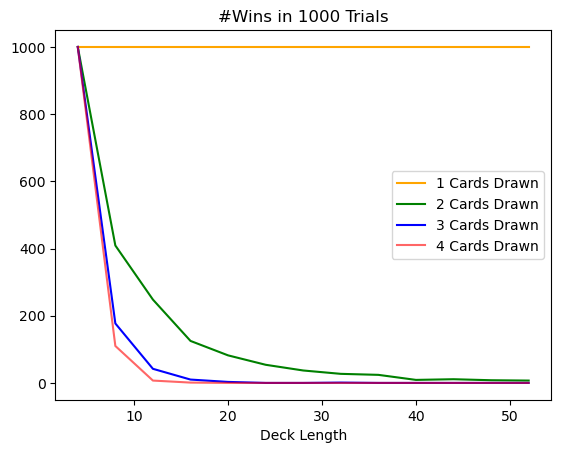

In [25]:
deck_length_mod = [z for z in range(4,53,4)] #at least 1 card per suit; deck length multiples of 4 

wins2 = [solitaire(2,1000,j) for j in deck_length_mod]
wins3 = [solitaire(3,1000,j) for j in deck_length_mod]
wins4 = [solitaire(4,1000,j) for j in deck_length_mod]

plt.plot(deck_length_mod, [1000 for w in deck_length_mod], color = 'orange', label = '1 Cards Drawn')
plt.plot(deck_length_mod, wins2, color = 'green', label = '2 Cards Drawn')
plt.plot(deck_length_mod, wins3, color = 'blue', label = '3 Cards Drawn')
plt.plot(deck_length_mod, wins4, color = 'red', label = '4 Cards Drawn',alpha = 0.6)

plt.title('#Wins in 1000 Trials')
plt.legend()
plt.xlabel('Deck Length')
plt.show()
plt.close()


In [28]:
#NB this cell will take approx. 20 min to run
start = time.time()
trials = [10**2,10**3,10**4,10**5,10**6]
winrate_2 = [solitaire(2,t,40) for t in trials]
winrate_3 = [solitaire(3,t,40) for t in trials]
winrate_4 = [solitaire(4,t,40) for t in trials]

print(trials)
print(winrate_2)
print(winrate_3)
print(winrate_4)

print('seconds to run: ' +str(time.time() - start))

[100, 1000, 10000, 100000, 1000000]
[2, 11, 124, 1081, 11332]
[0, 0, 0, 1, 32]
[0, 0, 0, 0, 0]
seconds to run: 1168.208565235138
